In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
voice_df = pd.read_csv('C:/Users/SHUBHAM.PARAB/Desktop/DigitalVidya/Datasets/voice.csv')
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
#Checking null values
voice_df.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [4]:
voice_df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [5]:
voice_df['label'] = pd.get_dummies(voice_df['label'],drop_first=True)
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [6]:
# 1. Load the "voice.csv" dataset and perform feature extraction by using "label" as target column

X= voice_df.iloc[:,:-1].values
y=voice_df.iloc[:,-1].values

In [7]:
# 2. Split the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# 3. Build a Logistic Regression classifier to detect the target
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,pred_lr)

from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_test,pred_lr)

cm_lr,acc_lr

(array([[257,  44],
        [ 10, 323]], dtype=int64), 0.9148264984227129)

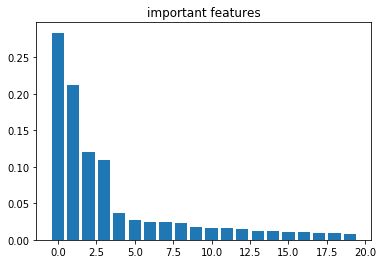

In [9]:
# 4. Check performances by using different number of features. Find the best set of features
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X,y)

feature_importances = tree_clf.feature_importances_
feature_names = voice_df.iloc[:,:-1].columns.tolist()
features = dict(zip(feature_names,feature_importances))
features = sorted(features.items(), key=lambda x: x[1], reverse=True)


plt.bar(range(len(features)), [imp[1] for imp in features], align='center')
plt.title('important features');

In [10]:
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_updated, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

pred_lr = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,pred_lr)

from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_test,pred_lr)

cm_lr,acc_lr

Total Features count: 20
Selected Features:  4


(array([[290,  11],
        [  6, 327]], dtype=int64), 0.973186119873817)

In [11]:
# 5. Build a KNN classifier to detect the label

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy


0.9810725552050473

In [12]:
# 6. Find and plot the best value for k

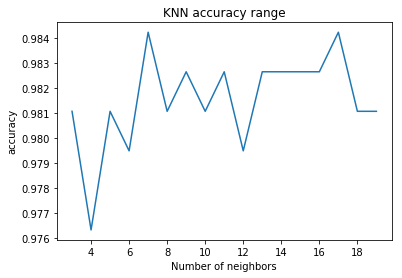

In [13]:
n_neighbors = np.arange(3, 20, 1)

accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)


plt.title('KNN accuracy range')
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.plot(n_neighbors, accuracies)
plt.show()

In [14]:
#K=7 will give the highest accuracy